In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
#plt.rcParams.update({   "text.usetex": True,})


In [2]:
# all output er i newtonian gauge af historiske årsager du kan overveje at udkommetnere gaugetransformation i koden senere.

In [71]:
kvec = np.logspace(1e-3,1e1,20)#
kvec = [1e-3,7e-2,5e-2,3e-2,1e-2,1e-1,1,1e1]
print(kvec)
Omega_M = 0.3
Omega_R = 7e-5
Omega_lambda = 1 - Omega_M - Omega_R
H0 = 67 / (3*1e5) # i 1/Mpc
cosmo_dict ={'H0':70, 'Omega_b':0.05, 'Omega_cdm':0.25, 'k_output_values':str(kvec).strip('[]'), 
           'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',}

cosmo = Class()
cosmo.set(cosmo_dict)
cosmo.compute()
bg = cosmo.get_background()

pts = cosmo.get_perturbations()['scalar']
print(bg.keys())
pts0=pts[0]
print(f"{pts0.keys()=}")


[0.001, 0.07, 0.05, 0.03, 0.01, 0.1, 1, 10.0]
dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
pts0.keys()=dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])


In [72]:
pts0=pts[0]
a_class = pts0['a']
print(a_class)

[1.96306470e-04 1.96306503e-04 1.96306536e-04 1.96306866e-04
 1.96307196e-04 1.96307525e-04 1.96307855e-04 1.96311153e-04
 1.96314451e-04 1.96317750e-04 1.96321048e-04 1.96346992e-04
 1.96372937e-04 1.96398883e-04 1.96424829e-04 1.96478268e-04
 1.96531710e-04 1.96585155e-04 1.96638603e-04 1.96692054e-04
 1.96914894e-04 1.97137784e-04 1.97360727e-04 1.97583721e-04
 1.97806766e-04 1.98029863e-04 1.98669986e-04 1.99310534e-04
 1.99951506e-04 2.00592901e-04 2.01234722e-04 2.01876966e-04
 2.03961049e-04 2.06049587e-04 2.08142581e-04 2.10240029e-04
 2.12341933e-04 2.14448292e-04 2.18001326e-04 2.21566965e-04
 2.25145208e-04 2.28736057e-04 2.32339511e-04 2.35955570e-04
 2.39584234e-04 2.45611935e-04 2.51674099e-04 2.57770726e-04
 2.63901818e-04 2.70067373e-04 2.76267391e-04 2.82501873e-04
 2.90806223e-04 2.99170940e-04 3.07596026e-04 3.16081481e-04
 3.24627305e-04 3.33233497e-04 3.41900058e-04 3.53386483e-04
 3.64977264e-04 3.76672399e-04 3.88471889e-04 4.00375734e-04
 4.12383934e-04 4.244964

Text(0.5, 0, 'a')

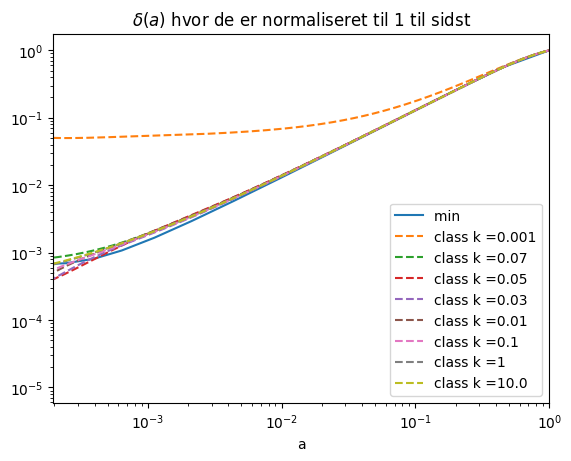

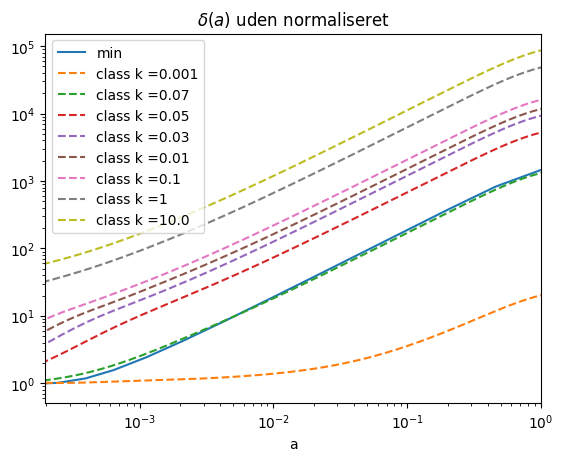

In [74]:
###########################################
### her regner jeg min version af delta ###

aend = 1
pts0=pts[0]
a_class = pts0['a']
a0 = pts0['a'][0]
def H(a):
    return H0 * np.sqrt(Omega_lambda + Omega_M /( a **3) + Omega_R /( a**4)) 

def tau_cal(a,y):
    # Vores "tids"-værdi i denne differentialligning er a
    tau = y[0]
    d_tau = 1 / (a ** 2 * H(a))
    return np.array(d_tau)

tau0 = (1/H0) * (Omega_R ** (-0.5)) * a0
sol_tau = sc.solve_ivp(tau_cal,t_span=[a0,aend],y0=[tau0])
tau =sol_tau.y[0]

def D_solve(tau,y):
    a = y[0]
    D = y[1]
    D_dt = y[2]
    a_dt = a * a * H(a)
    D2_dt2 = +  ((3 / 2) * H0 * H0 * Omega_M * D / a) - a * H(a) * D_dt 
    
    return [a_dt,D_dt,D2_dt2]

num = pts0["delta_cdm"][-1]
D0 = 1
dDdt = 0
params = np.array([a0,D0,dDdt])
sol_D = sc.solve_ivp(D_solve,t_span = [tau0,tau[-1]], y0 = params)
a_sol_D = sol_D.y[0]


#######################################
#########   figurene plottes ##########

plt.figure(1)
plt.loglog(sol_D.y[0],sol_D.y[1]/sol_D.y[1][-1],label="min ")
for i,k in enumerate(kvec):
    plt.loglog(pts[i]["a"],pts[i]["delta_cdm"]/pts[i]["delta_cdm"][-1],"--",label="class k ="+str(kvec[i]))
plt.xlabel("a")
plt.legend()
plt.xlim([a_sol_D[0],a_sol_D[-1]])
plt.title(r"$\delta(a)$ hvor de er normaliseret til 1 til sidst")


plt.figure(2)
plt.xlim([a_sol_D[0],a_sol_D[-1]])
plt.loglog(sol_D.y[0],sol_D.y[1],label=r"min")
for i,k in enumerate(kvec):
    plt.loglog(pts[i]["a"],-pts[i]["delta_cdm"],"--",label="class k ="+str(kvec[i]))
plt.legend(loc="upper left")

plt.title(r"$\delta(a)$ uden normaliseret")
plt.xlabel("a")
